## Project : Flight Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Importing required libraries

In [84]:
df = pd.read_excel(r'P:\data csience\3_Projects Udemy\airline\Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
#Checking missing values

In [85]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [86]:
df.dropna(inplace=True)

In [87]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
#Checking correctness of data type

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [ ]:
#Changing data type of columns to datatime format

In [89]:
def to_datetime(col):
    df[col] = pd.to_datetime(df[col])

In [90]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    to_datetime(i)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [92]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-05-26 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-26 05:50:00,2021-05-26 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-05-26 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-05-26 18:05:00,2021-05-26 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-05-26 16:50:00,2021-05-26 21:35:00,4h 45m,1 stop,No info,13302


In [ ]:
#Seperating the day and month from the column

In [93]:
df['journey_day'] = df['Date_of_Journey'].dt.day
df['journey_month'] = df['Date_of_Journey'].dt.month

In [ ]:
#Droping the original column as data is extracted from it

In [94]:
df.drop('Date_of_Journey',axis =1,inplace = True)

In [95]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-05-26 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-26 05:50:00,2021-05-26 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-05-26 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-05-26 18:05:00,2021-05-26 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-05-26 16:50:00,2021-05-26 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [96]:
def to_hour(col):
    df[col+'_hour']=df[col].dt.hour

def to_min(col):
    df[col+'_minute'] = df[col].dt.minute 

def drop(col):
    df.drop(col,axis = 1,inplace=True)



In [97]:
to_hour('Dep_Time')
to_min('Dep_Time')


In [98]:
drop('Dep_Time')
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-26 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-05-26 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-05-26 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


In [99]:
to_hour('Arrival_Time')
to_min('Arrival_Time')
drop('Arrival_Time')

In [100]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [ ]:
# In Duration column some data is missing i.e hours and minutes
#Defin and he function
#Line 8 and 10 dont forget to give spaces ' 0m' , '0h '

In [101]:
duration = list(df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' ')) == 2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]

In [ ]:
#Assigining the duration list from the function to the column of original dataset

In [102]:
df['Duration'] = duration

In [103]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [ ]:
#Taking on numerical value fro the column Duration

In [104]:
def hour(x):
    return x.split(' ')[0][0:-1]


In [105]:
def minute(x):
    return x.split(' ')[1][0:-1]

In [83]:
#'5h 25m'.split(' ')[1][0:-1]

'25'

In [106]:
df['Duration_hour'] = df['Duration'].apply(hour)
df['Duration_min'] = df['Duration'].apply(minute)


In [ ]:
#Droping the column Duration after extraction

In [107]:
df.drop('Duration',axis = 1,inplace = True)

In [108]:
df.head(20)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,3873,24,6,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,3,12,18,55,10,25,15,30
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,22270,3,1,8,0,5,5,21,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,3,12,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,8625,27,5,11,25,19,15,7,50


In [ ]:
#Checking the datatye of newly created features

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Source               10682 non-null  object
 2   Destination          10682 non-null  object
 3   Route                10682 non-null  object
 4   Total_Stops          10682 non-null  object
 5   Additional_Info      10682 non-null  object
 6   Price                10682 non-null  int64 
 7   journey_day          10682 non-null  int64 
 8   journey_month        10682 non-null  int64 
 9   Dep_Time_hour        10682 non-null  int64 
 10  Dep_Time_minute      10682 non-null  int64 
 11  Arrival_Time_hour    10682 non-null  int64 
 12  Arrival_Time_minute  10682 non-null  int64 
 13  Duration_hour        10682 non-null  object
 14  Duration_min         10682 non-null  object
dtypes: int64(7), object(8)
memory usage: 1.3+ MB


In [ ]:
#Changing the datatype of the features

In [110]:
df['Duration_hour'] = df['Duration_hour'].astype(int)
df['Duration_min'] = df['Duration_min'].astype(int)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Source               10682 non-null  object
 2   Destination          10682 non-null  object
 3   Route                10682 non-null  object
 4   Total_Stops          10682 non-null  object
 5   Additional_Info      10682 non-null  object
 6   Price                10682 non-null  int64 
 7   journey_day          10682 non-null  int64 
 8   journey_month        10682 non-null  int64 
 9   Dep_Time_hour        10682 non-null  int64 
 10  Dep_Time_minute      10682 non-null  int64 
 11  Arrival_Time_hour    10682 non-null  int64 
 12  Arrival_Time_minute  10682 non-null  int64 
 13  Duration_hour        10682 non-null  int32 
 14  Duration_min         10682 non-null  int32 
dtypes: int32(2), int64(7), object(6)
memory usage: 1.2+ M

In [ ]:
#Getting categorical features

In [224]:
cat_col = [col for col in df.columns if df[col].dtype=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [ ]:
#Getting numerical features

In [225]:
num_col = [col for col in df.columns if df[col].dtype!='O']
num_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hour',
 'Duration_min']

In [ ]:
#Processing the categorical data

In [226]:
categorical_features = df[cat_col]
categorical_features

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info
...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info


In [227]:
categorical_features['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

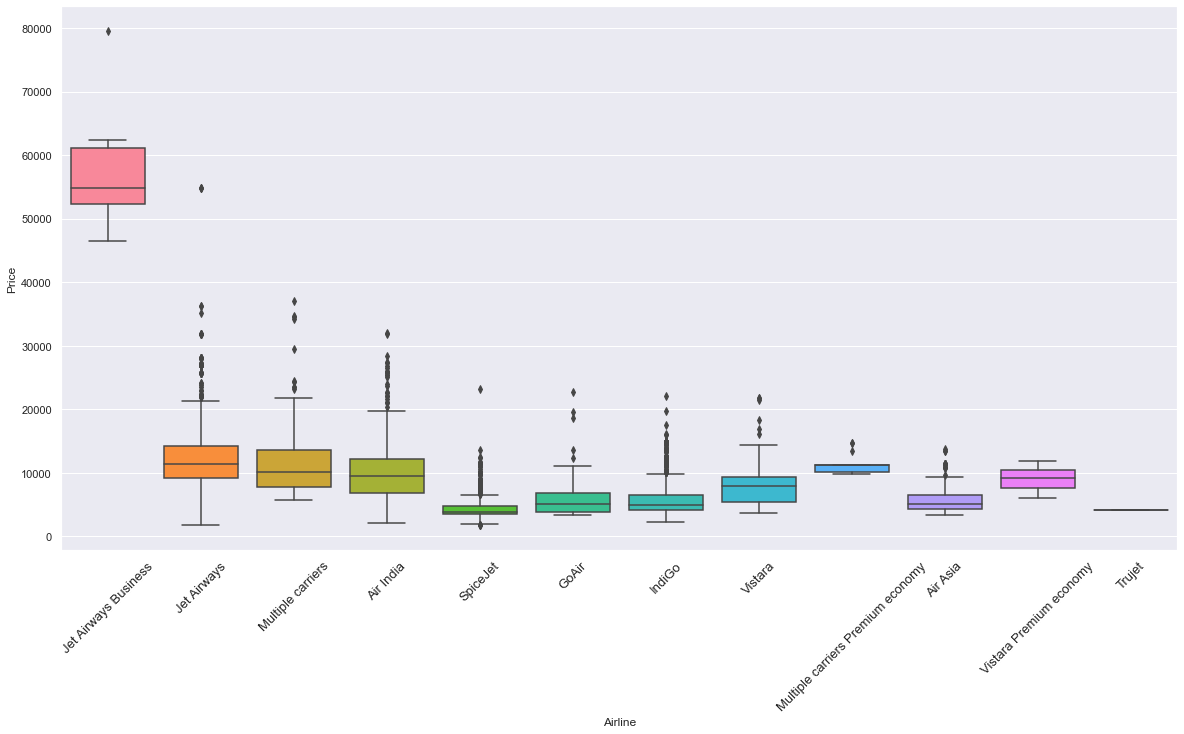

In [228]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45,fontsize = 13)
sns.boxplot(y = 'Price', x='Airline',saturation=8,data=df.sort_values('Price',ascending=False))

From graph we can see that Jet Airways Business have the highest Price., Apart from the first Airline almost all are having similar median

In [229]:
Airline = pd.get_dummies(categorical_features['Airline'],
                         drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [230]:
categorical_features['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

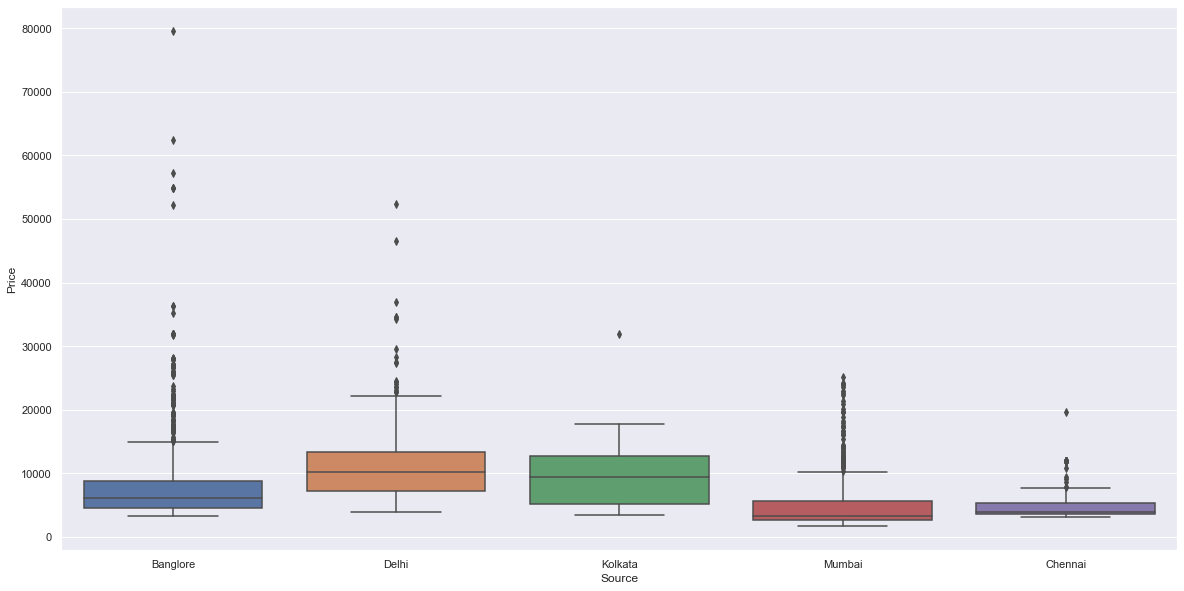

In [231]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'Source',y='Price',data=df.sort_values('Price',ascending=False))

In [232]:
Source = pd.get_dummies(categorical_features['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [233]:
categorical_features['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [234]:
Destination = pd.get_dummies(categorical_features['Destination'],
                            drop_first = True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [235]:
categorical_features.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [236]:
categorical_features['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → JLR → HYD                   1
BOM → DED → DEL → HYD             1
CCU → RPR → HYD → BLR             1
BOM → BLR → CCU → BBI → HYD       1
BOM → COK → MAA → HYD             1
Name: Route, Length: 128, dtype: int64

In [237]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [238]:
categorical_features['Route_1']=categorical_features['Route'].str.split('→').str[0]
categorical_features['Route_2']=categorical_features['Route'].str.split('→').str[1]
categorical_features['Route_3']=categorical_features['Route'].str.split('→').str[2]
categorical_features['Route_4']=categorical_features['Route'].str.split('→').str[3]
categorical_features['Route_5']=categorical_features['Route'].str.split('→').str[4]

In [239]:
categorical_features.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [240]:
categorical_features['Route_1'].fillna('None',inplace = True)
categorical_features['Route_2'].fillna('None',inplace = True)
categorical_features['Route_3'].fillna('None',inplace = True)
categorical_features['Route_4'].fillna('None',inplace = True)
categorical_features['Route_5'].fillna('None',inplace = True)

In [241]:
categorical_features.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,None,None


In [242]:
for i in categorical_features.columns:
    print('{} has {} no. of unique categories'.format(i,len(categorical_features[i].value_counts())))

Airline has 12 no. of unique categories
Source has 5 no. of unique categories
Destination has 6 no. of unique categories
Route has 128 no. of unique categories
Total_Stops has 5 no. of unique categories
Additional_Info has 10 no. of unique categories
Route_1 has 5 no. of unique categories
Route_2 has 45 no. of unique categories
Route_3 has 30 no. of unique categories
Route_4 has 14 no. of unique categories
Route_5 has 6 no. of unique categories


In [243]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [244]:
for i in ['Route_1','Route_2','Route_3','Route_4','Route_5']:
    categorical_features[i]=le.fit_transform(categorical_features[i])
    

In [245]:
categorical_features.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,0,34,8,13,5


In [246]:
categorical_features.drop(['Route','Additional_Info'],axis=1)

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,2,5,29,13,5
10679,Air India,Kolkata,Banglore,non-stop,2,5,29,13,5
10680,Jet Airways,Banglore,Delhi,non-stop,0,13,29,13,5
10681,Vistara,Banglore,New Delhi,non-stop,0,13,29,13,5


In [247]:
categorical_features['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [248]:
dict = {'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}
categorical_features['Total_Stops']=categorical_features['Total_Stops'].map(dict)

In [249]:
categorical_features.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,0,34,8,13,5


In [250]:
df[num_col]

,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min
0,3897,24,3,22,20,1,10,2,50
1,7662,5,1,5,50,13,15,7,25
2,13882,6,9,9,25,4,25,19,0
3,6218,5,12,18,5,23,30,5,25
4,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...
10678,4107,4,9,19,55,22,25,2,30
10679,4145,27,4,20,45,23,20,2,35
10680,7229,27,4,8,20,11,20,3,0
10681,12648,3,1,11,30,14,10,2,40


In [296]:
data_train = pd.concat([categorical_features,Airline,Source,Destination,
                       df[num_col]],axis=1)
data_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [297]:
data_train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi', 'Price',
       'journey_day', 'journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hour',
       'Duration_min'],
      dtype='object')

In [298]:

pd.options.display.max_columns=None

In [299]:
data_train = data_train.drop(['Airline','Source','Destination',
                'Route','Additional_Info'],axis=1)


In [300]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [301]:
def plot(df,col):
    
    fig,(ax1,ax2) = plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax = ax2)
    


<Figure size 2160x1440 with 0 Axes>

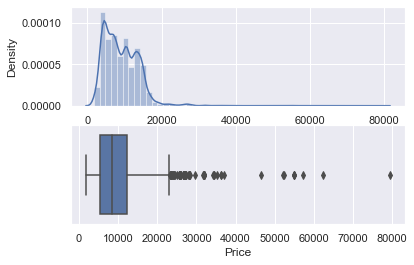

In [302]:
plt.figure(figsize=(30,20))
plot(data_train,'Price')

In [303]:
data_train['Price'] =np.where(data_train['Price']>=40000,data_train['Price'].median(),
        data_train['Price'])

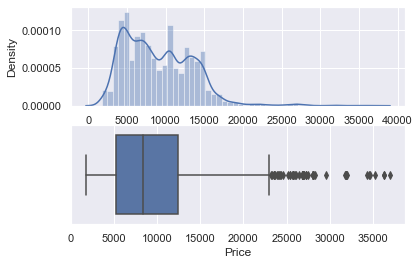

In [304]:
plot(data_train,'Price')

In [305]:
X = data_train.drop('Price',axis = 1)
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [307]:
y = data_train['Price']
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [309]:
from sklearn.feature_selection import mutual_info_classif


In [313]:
mutual_info_classif(X,y)

array([2.13228384, 2.07750077, 2.74210334, 2.30558887, 1.49842707,
       0.70180427, 0.73663484, 0.09924408, 0.64637915, 0.91203093,
       0.01773298, 0.55144699, 0.01870331, 0.33436473, 0.01762577,
       0.21796544, 0.01237226, 0.16646417, 1.56366276, 0.89051249,
       0.2872051 , 1.56296624, 0.40656865, 0.29661692, 0.1763406 ,
       0.35749715, 1.08902169, 0.866229  , 1.41812758, 1.21002644,
       1.85951587, 1.54893478, 1.77653476, 1.069236  ])

In [317]:
important =pd.DataFrame(mutual_info_classif(X,y),index = X.columns)

In [336]:
important

,importance
Total_Stops,2.144119
Route_1,2.062646
Route_2,2.759071
Route_3,2.286476
Route_4,1.487121
Route_5,0.772140
Air India,0.770675
GoAir,0.094517
IndiGo,0.652732
Jet Airways,0.916634


In [320]:
important.columns = ['importance']
important.sort_values(by='importance',ascending=False)

,importance
Route_2,2.759071
Route_3,2.286476
Total_Stops,2.144119
Route_1,2.062646
Arrival_Time_hour,1.851721
Duration_hour,1.767950
Delhi,1.551328
Cochin,1.549268
Arrival_Time_minute,1.504872
Route_4,1.487121


In [321]:
from sklearn.model_selection import train_test_split


In [326]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [351]:
from sklearn import metrics
import pickle

def predict(ml_model,dump):
    model = ml_model.fit(X_train,y_train)
    print('Training score: {}'.format(model.score(X_train,y_train)))
    
    y_pred = model.predict(X_test)
    print('Predictions are:\n {}'.format(y_pred))
    print('\n')
    
    r2_score = metrics.r2_score(y_test,y_pred)
    print('r_score: {}'.format(r2_score))
    
    print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
    print('MSE:',metrics.mean_squared_error(y_test,y_pred))
    print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    
    sns.distplot(y_test-y_pred)
    
    if dump==1:
        ##dump your model using pickle so that we will re-use
        file=open(r"P:\data csience\3_Projects Udemy\airline\model.pkl",'wb')
        pickle.dump(model,file)

In [352]:
from sklearn.ensemble import RandomForestRegressor

Training score: 0.954390900332319
Predictions are:
 [10409.715       6089.41        3904.6275     ... 10615.15316667
  6427.55       10504.49      ]


r_score: 0.8279816963240278
MAE: 1129.2260612922796
MSE: 3228161.8336650026
RMSE 1796.708611229156


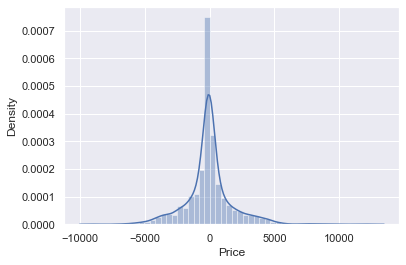

In [353]:
predict(RandomForestRegressor(),1)

In [339]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

Training score: 0.6120328488710792
Predictions are:
 [11626.42776919  7626.10630747  4063.44248746 ... 11692.65230441
  6200.20917169 11316.66307764]


r_score: 0.6308845931926822
MAE: 1894.6142960107486
MSE: 6926962.0907182265
RMSE 2631.912249813475


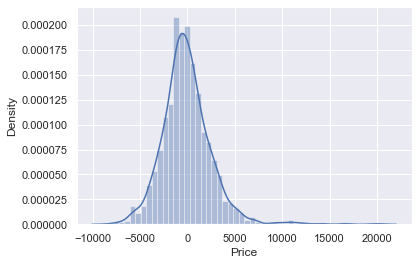

In [354]:
predict(LinearRegression(),0)

Training score: 0.9681464730826035
Predictions are:
 [ 8529.  6388.  3841. ...  8586.  6442. 10678.]


r_score: 0.6798691078015985
MAE: 1356.8295897675869
MSE: 6007699.796404617
RMSE 2451.060953220996


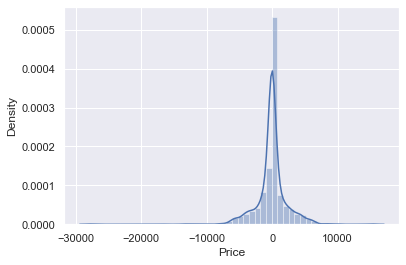

In [355]:
predict(DecisionTreeRegressor(),0)

Training score: 0.775298930432907
Predictions are:
 [10525.8  6858.8  3860.2 ... 10733.4  6472.8  7671.2]


r_score: 0.6821117097635321
MAE: 1682.0265793167991
MSE: 5965614.263022929
RMSE 2442.4606983578938


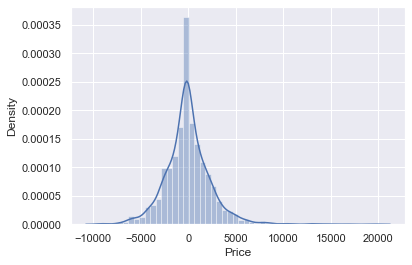

In [356]:
predict(KNeighborsRegressor(),0)

In [357]:
from sklearn.model_selection import RandomizedSearchCV

In [359]:
n_estimators =[int(x) for x in np.linspace(start =100,stop=1200,num=6)]
max_depth=[int(x) for x in np.linspace(start =5,stop=30,num=4)]
min_sample_split= [5,10,15,100]

In [371]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':['auto','sqrt'],
    'max_depth':max_depth,
    'min_samples_split':min_sample_split
}

In [372]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [373]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()

In [374]:

rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,
                             cv=3,verbose=2,n_jobs=-1)

In [375]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [376]:
rf_random.best_params_

{'n_estimators': 320,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 13}

In [377]:
prediction = rf_random.predict(X_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

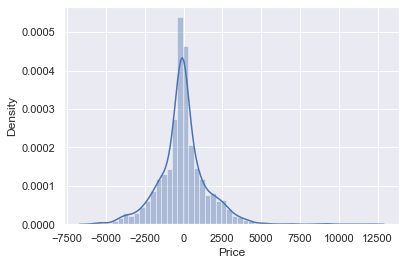

In [378]:
sns.distplot(y_test-prediction)

In [380]:
metrics.r2_score(y_test,prediction)

0.8634807454369691

In [381]:
print('MAE',metrics.mean_absolute_error(y_test,prediction))
print('MSE',metrics.mean_squared_error(y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE 1081.130178734848
MSE 2561972.986147591
RMSE 1600.6164394218845


In [388]:
# open a file, where you want to store the data
file=open(r'P:\data csience\3_Projects Udemy\airline\rf_random.pkl','wb')


# dump information to that file
pickle.dump(rf_random,file)




In [389]:
model=open(r'P:\data csience\3_Projects Udemy\airline\rf_random.pkl','rb')
forest=pickle.load(model)



In [390]:

y_prediction=forest.predict(X_test)
y_prediction


metrics.r2_score(y_test,y_prediction)

0.8634807454369691